In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wego = pd.read_csv("../data/headway_data_8-1-23_9-30-23.csv")

In [155]:
pd.set_option('display.max_columns', None) #shows every column in preview pane

pd.reset_option('display.max_columns') #resets above

In [179]:
pd.set_option('display.max_rows', None)

pd.reset_option('display.max_rows')

In [5]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


1. What is the overall on-time performance, and what do the overall distribution of adherence look like?

In [7]:
wego.shape

(350329, 30)

In [51]:
#based on tarik's
#this function doesn't account for any overload_id that also qualifies as an adjusted_ontime_count
#in order to achieve that, an extra layer of specificity is req'd by using .loc[] and setting the adjusted_ontime_count ==1
OT_total = wego['ADJUSTED_ONTIME_COUNT'].sum()
EARLY_total = wego['ADJUSTED_EARLY_COUNT'].sum()
LATE_total = wego['ADJUSTED_LATE_COUNT'].sum()
grand_total = OT_total + EARLY_total + LATE_total
OT_performance = round((OT_total/grand_total)*100,2)
print(OT_total)
print(EARLY_total)
print(LATE_total)
print(grand_total)
print(f"Overall on-time performance is {OT_performance}%")

270048
9775
59038
338861
Overall on-time performance is 79.69%


In [49]:
#isabelle's adjusted function
on_time_performance = wego.loc[wego['ADJUSTED_ONTIME_COUNT']==1]
#on_time_performance = on_time_performance.loc[on_time_performance['TRIP_EDGE'] != 2]
on_time_performance_pct = round((len(on_time_performance) / len(wego))*100,2)
print(on_time_performance_pct)

77.08


In [12]:
routes = [3, 7, 22, 23, 50, 52, 55, 56]
filtering = wego[wego['ROUTE_ABBR'].isin(routes)]
route_totals = filtering.groupby('ROUTE_ABBR')['ADJUSTED_ONTIME_COUNT'].sum()
print(route_totals)

ROUTE_ABBR
3     34516
7     13417
22    22492
23    35137
50    36309
52    37736
55    42080
56    48361
Name: ADJUSTED_ONTIME_COUNT, dtype: int64


In [45]:
#routes = [3, 7, 22, 23, 50, 52, 55, 56]
#filtering = wego[wego['ROUTE_ABBR'].isin(routes)] ~this is kind of pointless as it is redundant
wego.groupby('ROUTE_ABBR')['ADHERENCE'].mean()
print(route_totals)

ROUTE_ABBR
3    -3.761491
7    -3.346555
22   -1.138107
23   -1.760110
50   -2.505022
52   -3.971342
55   -4.823302
56   -2.703988
Name: ADHERENCE, dtype: float64


In [47]:
#isabelle's original function
#on_time_performance = wego.loc[wego['ADHERENCE'].between(-6,1)]
#on_time_performance = on_time_performance.loc[on_time_performance['TRIP_EDGE'] != 2]
#on_time_performance_pct = round((len(on_time_performance) / len(wego))*100,2)
#print(on_time_performance_pct)

2. How does direction of travel, route, or location affect the on-time performance?

In [43]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [75]:
wego['BLOCK_ABBR'].unique()

array([2200, 2201, 2202, 2210, 2211, 2300, 2301, 2302, 2303, 2310, 2311,
       2312, 2313,  300,  301,  302,  303,  304,  305,  310,  311,  312,
        313,  314,  315,  316,  317,  318,  319, 4101, 5000, 5001, 5002,
       5003, 5004, 5005, 5006, 5200, 5201, 5202, 5203, 5204, 5205, 5206,
       5210, 5211, 5212, 5213, 5214, 5215, 5216, 5217, 5218, 5500, 5501,
       5502, 5503, 5504, 5505, 5506, 5507, 5508, 5509, 5510, 5511, 5512,
       5513, 5592, 5593, 5594, 5600, 5601, 5602, 5603, 5604, 5605, 5606,
       5607, 5608, 5609, 5610, 5611,  700,  701,  702,  703,  704,  705,
        706, 2804,  390, 5094, 5590, 5690, 6401, 8401, 8405, 8601, 8604,
       9302, 9950, 9975], dtype=int64)

In [91]:
wego['BLOCK_ABBR'].value_counts()

BLOCK_ABBR
300     8894
2312    8532
2310    8233
5003    8086
5004    8048
        ... 
5094      72
8405      72
6401      72
5690      72
9975      72
Name: count, Length: 102, dtype: int64

In [149]:
block_count = wego[wego['ADJUSTED_ONTIME_COUNT'] == 1]['BLOCK_ABBR'].value_counts().reset_index()
block_count.columns = ['BLOCK_ABBR', 'on_time_count']
block_count = block_count.sort_values(by='on_time_count', ascending=False)
block_count
#on_time_blocks = round((len('on_time_count') / len(wego))*100,2)
#on_time_blocks

,BLOCK_ABBR,on_time_count
0,5003,7134
1,2310,7002
2,5004,6884
3,300,6330
4,2311,6297
...,...,...
97,5094,37
98,5690,33
99,8401,32
100,8601,31


In [147]:
block_count['percent_of_total'] = round((block_count['on_time_count'] / len(wego)) * 100, 2)
print(block_count)

     BLOCK_ABBR  on_time_count  percent_of_total
0          5003           7134              2.04
1          2310           7002              2.00
2          5004           6884              1.97
3           300           6330              1.81
4          2311           6297              1.80
..          ...            ...               ...
97         5094             37              0.01
98         5690             33              0.01
99         8401             32              0.01
100        8601             31              0.01
101        5590             14              0.00

[102 rows x 3 columns]


In [203]:
on_time_performance = wego[wego['ADJUSTED_ONTIME_COUNT'] == 1] # on-time rows
on_time_performance_pct = round((len(on_time_performance) / len(wego)) * 100, 2) # overall ot performance pct
print("Overall on-time performance is", on_time_performance_pct, "%")
block_count = on_time_performance['BLOCK_ABBR'].value_counts().reset_index()
block_count.columns = ['BLOCK_ABBR', 'on_time_count']
block_count = block_count.sort_values(by='on_time_count', ascending=False) # count on-time per block and calculate percent of total dataset
block_count['percent_of_total'] = round((block_count['on_time_count'] / len(wego)) * 100, 2) # % of total col
block_count

Overall on-time performance is 77.08 %


,BLOCK_ABBR,on_time_count,percent_of_total
0,5003,7134,2.04
1,2310,7002,2.00
2,5004,6884,1.97
3,300,6330,1.81
4,2311,6297,1.80
5,5002,6296,1.80
6,2312,6289,1.80
7,5000,6225,1.78
8,2200,6148,1.75
9,2313,5901,1.68


In [207]:
on_time_performance = wego[wego['ADJUSTED_ONTIME_COUNT'] == 1] # on-time rows
on_time_performance.count()

CALENDAR_ID                  270048
SERVICE_ABBR                 270048
ADHERENCE_ID                 270048
DATE                         270048
ROUTE_ABBR                   270048
BLOCK_ABBR                   270048
OPERATOR                     270048
TRIP_ID                      270048
OVERLOAD_ID                  270048
ROUTE_DIRECTION_NAME         270048
TIME_POINT_ABBR              270048
ROUTE_STOP_SEQUENCE          270047
TRIP_EDGE                    270048
LATITUDE                     270048
LONGITUDE                    270048
SCHEDULED_TIME               270048
ACTUAL_ARRIVAL_TIME          270048
ACTUAL_DEPARTURE_TIME        270048
ADHERENCE                    270048
SCHEDULED_HDWY               211467
ACTUAL_HDWY                  211421
HDWY_DEV                     211299
ADJUSTED_EARLY_COUNT         270048
ADJUSTED_LATE_COUNT          270048
ADJUSTED_ONTIME_COUNT        270048
STOP_CANCELLED               270048
PREV_SCHED_STOP_CANCELLED    215903
IS_RELIEF                   

<Axes: xlabel='BLOCK_ABBR', ylabel='percent_of_total'>

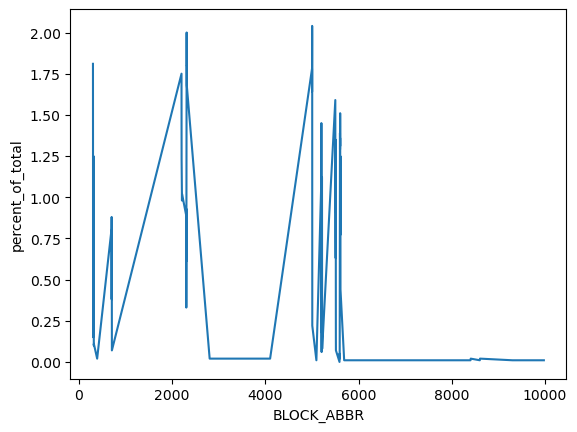

In [197]:
sns.lineplot(data=block_count, x="BLOCK_ABBR", y="percent_of_total")

C:\Users\jcbja\AppData\Local\Temp\ipykernel_81628\1225804389.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


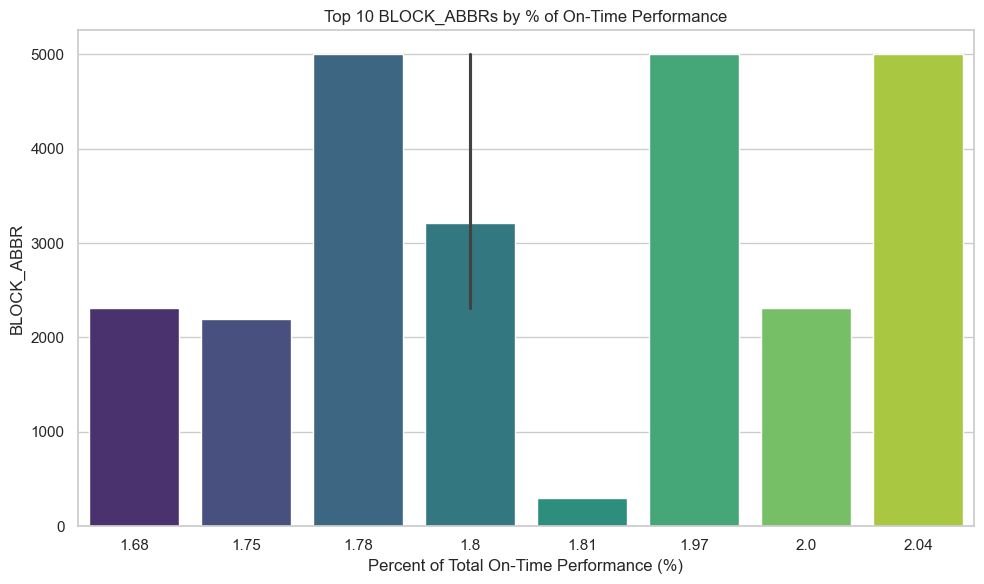

In [199]:
# Set plot style
sns.set(style="whitegrid")

# Plot top 10 on-time blocks
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(
    data=block_count.head(top_n),
    x='percent_of_total',
    y='BLOCK_ABBR',
    palette='viridis'
)

plt.title(f"Top {top_n} BLOCK_ABBRs by % of On-Time Performance")
plt.xlabel("Percent of Total On-Time Performance (%)")
plt.ylabel("BLOCK_ABBR")
plt.tight_layout()
plt.show()

In [18]:
RD_OT = wego.groupby('ROUTE_DIRECTION_NAME')['ADJUSTED_ONTIME_COUNT'].sum()
RD_EARLY = wego.groupby('ROUTE_DIRECTION_NAME')['ADJUSTED_EARLY_COUNT'].sum()
RD_LATE = wego.groupby('ROUTE_DIRECTION_NAME')['ADJUSTED_LATE_COUNT'].sum()
RD_GT = RD_OT + RD_EARLY + RD_LATE
RD_OT_PERF = round((RD_OT/RD_GT)*100,2)
print(RD_GT)
print(RD_OT_PERF)

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    179306
TO DOWNTOWN      159555
dtype: int64
ROUTE_DIRECTION_NAME
FROM DOWNTOWN    74.96
TO DOWNTOWN      85.01
dtype: float64


sns.barplot(x='ROUTE_ABBR', y='ADJUSTED_ONTIME_COUNT', data=wego)
plt.show()

sns.lineplot(x='TIME_POINT_ABBR', y='ADJUSTED_ONTIME_COUNT', data=wego, marker='o')
plt.title('Total Count by Route')
plt.grid(True)
plt.show()

3. How does time of day or day of week affect on-time performance?